<a href="https://colab.research.google.com/github/abdullahkrs/e-Portfolio-Machine-Learning-January-2025/blob/main/Unit06_KMeans_WeatherAUS_TaskC_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🌦️ Unit 6 Seminar: K-Means Clustering on WeatherAUS Dataset

This notebook performs **K-Means Clustering** on the `weatherAUS.csv` dataset from Kaggle.

---

## 📌 Task C: Weather Data Clustering
- Upload `weatherAUS.csv`
- Remove categorical columns (`RainToday`, `RainTomorrow`)
- Handle missing values
- Apply **KMeans clustering** for K = 2 to 6
- Visualize clusters using PCA

---


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files
import io

# Upload the CSV
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Unit06_weatherAUS.csv']))

# Drop categorical columns
df = df.drop(['RainToday', 'RainTomorrow'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Keep only numeric data
X = df.select_dtypes(include=[np.number])

print("Dataset shape after cleaning:", X.shape)
X.head()


Saving Unit06_weatherAUS.csv to Unit06_weatherAUS.csv
Dataset shape after cleaning: (120381, 12)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


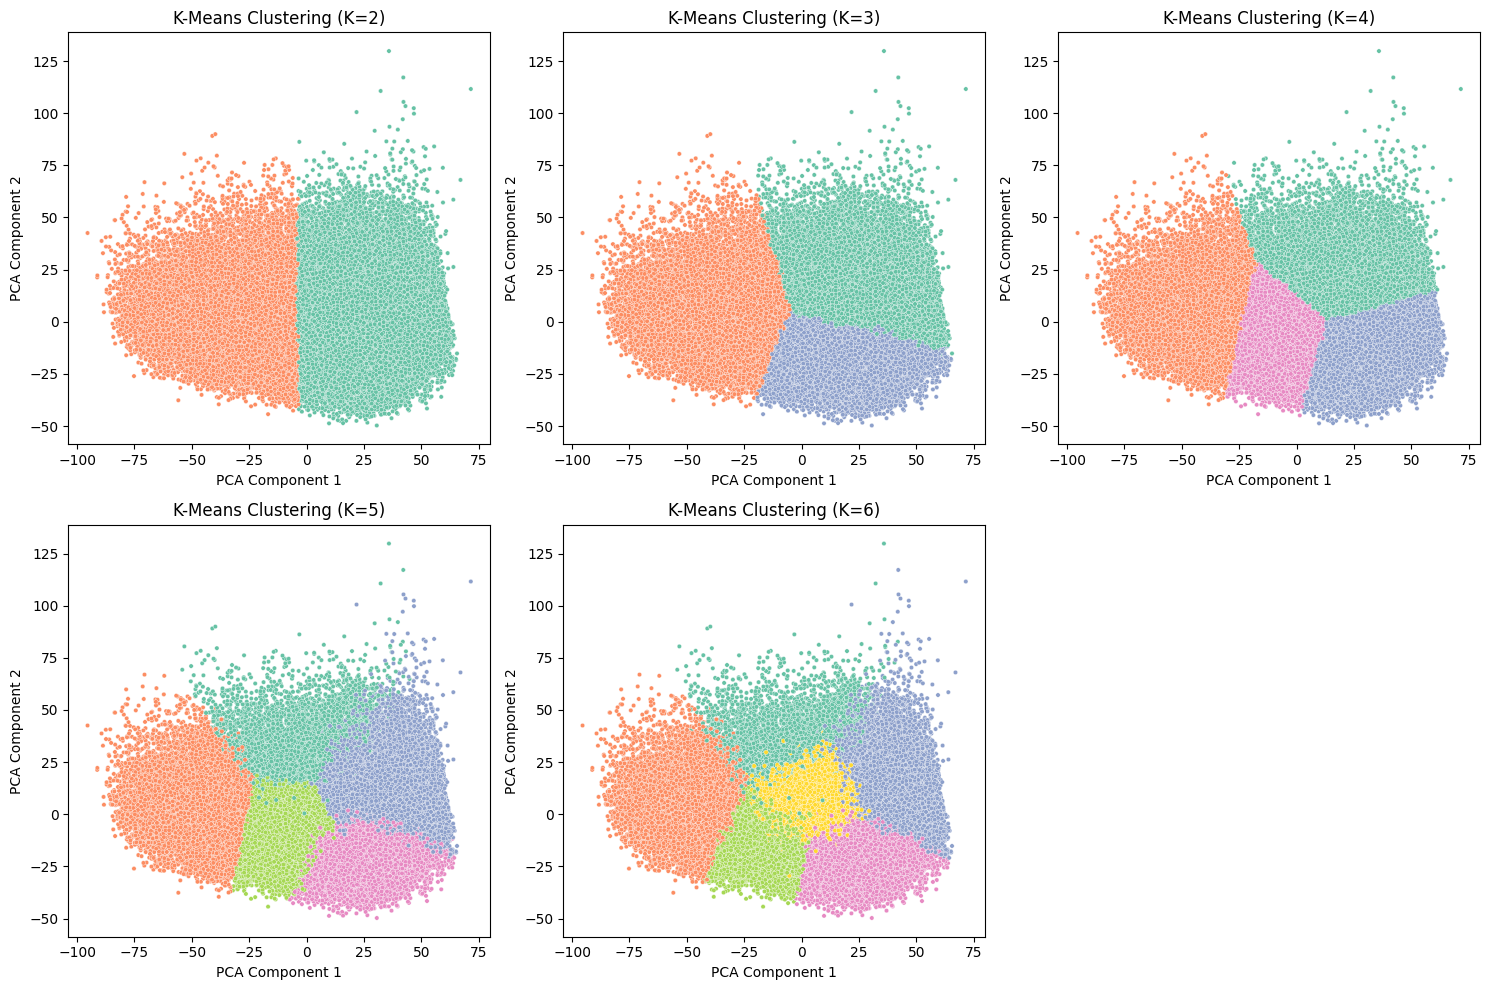

In [2]:

# PCA for 2D reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Loop through values of K
plt.figure(figsize=(15, 10))
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    clusters = km.fit_predict(X)

    # Plot
    plt.subplot(2, 3, k - 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=10, legend=False)
    plt.title(f"K-Means Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()



## ✅ Summary

- KMeans clustering was applied to a cleaned version of the WeatherAUS dataset.
- The clustering results were visualized for **K = 2 to K = 6**.
- Dimensionality reduction using PCA helped in plotting the clusters in 2D.
- Clustering weather data can help discover hidden weather patterns or conditions.

---
